1. 이터레이터(iterator)
    - 데이터를 차례대로 꺼낼 수 있도록 해주는 객체
    - for i in range(100) : 0부터 99까지의 값을 차례대로 하나씩 꺼낼 수 있는 이터레이터 객체가 만들어짐
2. 반복 가능한 객체(iterable) : list, dict, set, str, bytes, tuple, range
    - for in 반복문, Range, enumerate 에서 iterable한 타입과 iterable한 타입을 확인하는 방법이 있습니다.
   

In [2]:
dir([1,2,3]) #'__iter__' : 이터레이터 객체가 있는 걸 의미
it=[1,2,3].__iter__()

In [4]:
# 이터레이터는 next를 이용해서 데이터를 꺼낼 수 있음
it.__next__()

1

In [5]:
it.__next__()

2

In [6]:
it.__next__()

3

In [8]:
it=range(3).__iter__()
it.__next__()

0

In [ ]:
# iterator 동작 원리
# for i in range(3):
#     print(i)
# __iter__() -> __next__() -> 0
#            -> __next__() -> 1
#            -> __next__() -> 2    

In [9]:
# iterator 직접 코딩
class Counter:
    def __init__(self, stop): #0번, 1번, 2번 붕어빵 만드는게 목표 
        self.cur=0 # 현재 붕어빵 번호
        self.stop=stop # 붕어빵 굽기 종료 시점
    def __iter__(self):
        return self # 현재 자기자신 반환
    def __next__(self):
        if self.cur<self.stop: # 현재 붕어빵 번호가 붕어빵 굽기 종료 번호보다 작으면
            r=self.cur
            self.cur += 1
            return r
        else:
            raise StopIteration
            
# 붕어빵기계(클래스), 붕어빵(객체)
for i in Counter(3): #붕어빵기계(붕어빵3마리)
    print(i) #0 1 2

0
1
2


In [10]:
a,b,c=Counter(3)
a

0

In [12]:
a,_,c=Counter(3)
c

2

2. 제너레이터 : 이터레이터를 생성해주는 함수
    - yield 키워드 사용하여 생성.

In [14]:
def num_gen(): # 제너레이터
    yield 1
    yield 2
    yield 3
    
for i in num_gen():
    print(i) # 1 2 3 출력

1
2
3


In [15]:
# 변수=next(제너레이터 객체)
g=num_gen()
next(g)

1

In [16]:
next(g)

2

In [17]:
next(g)

3

In [18]:
def myGen():
    i=0
    while True:
        i+=1
        yield i

In [20]:
for i in myGen():
    print(i)
    if i>5:
        break

1
2
3
4
5
6


## keras_도형이미지 분류 based CNN
Convolution layer : 필터로 특성을 추출
   - Conv2D(32[필터의 개수], (5,5)[필터(커널)의 크기], padding = "SAME" or "valid" [이미지 사이드 처리 선택, same:이미지크기 유지, valid:크기 축소됨], input_shape=(64,64,1) [입력이미지 크기], activation="relu" or "sigmoid"...)  
   - 필터: 가중치

### CNN을 만드는 과정
1. 문제 정의
    - 다중 분류 문제.
    - 입력 : 도형이미지, 출력: 각 도형 확률
2. 데이터 수집(데이터 부족 -> 데이터 생성)
    - 케라스 : ImageDataGenerator(이미지 데이터를 생성할 수 있는 기능이 있는 클래스)를 사용해서 데이터 증식, 이미지파일 학습
3. 모델 생성
    1. conv layer:입력(24*24), 채널(3), 필터(3*3), 필터개수(32), 활성화(relu)
    2. pooling:크기(2*2)
    3. flatten
    4. dense : 출력(128), 활성화(relu)
    5. dense : 출력(3), 활성화(softmax)
4. 학습
5. 평가

In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator

In [44]:
# api : https://keras.io/preprocessing/image/#imagedatagenerator-methods
# flow_from_directory : 이미지의 크기를 동일하게 지정해주기 위해 쓰는 함수
# 이미지 
train_datagen=ImageDataGenerator(rescale=1./255) # 픽셀 값을 0~1 범위로 변환
test_datagen=ImageDataGenerator(rescale=1./255) 

In [45]:
# 이미지끼리 클래스별로 나누기
train_gen=train_datagen.flow_from_directory(
'data/hand/handwriting_shape/train',
target_size=(24,24),
class_mode="categorical",
batch_size=3
)

test_gen=test_datagen.flow_from_directory(
'data/hand/handwriting_shape/test',
target_size=(24,24),
class_mode="categorical",
batch_size=3
)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [42]:
type(train_gen) # 제너레이터
for x,y in train_gen:
    print(x)
    print("="*50)
    print(y)
    print("="*50)
    print(x.shape)
    print("="*50)
    print(y.shape)
    break

[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1

In [57]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3), 
                 padding='valid'))
# padding default=valid
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 1차원 데이터는 MaxPool1D 쓰지만, 1차원 데이터를 다루는 경우는 거의 없고 주로 2D를 씀
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0820 11:54:45.811852   300 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 11:54:45.833767   300 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [60]:
# fit : 케라스 모델 학습 함수
# fit_generator : 제너레이터로 생성된 데이터를 학습시킬 떄 쓰는 함수
model.fit_generator(train_gen,
                    steps_per_epoch=15, # 1에폭:45개, 배치:3이므로 45/3=15
                    epochs=100,
                    validation_data=test_gen,
                    validation_steps=5)

W0820 12:03:45.402354   300 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 12:03:45.455237   300 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
15/15 [==============================] - 1s 57ms/step - loss: 1.0893 - acc: 0.5111 - val_loss: 0.6640 - val_acc: 0.6667
Epoch 2/100
15/15 [==============================] - 0s 17ms/step - loss: 0.3424 - acc: 0.8444 - val_loss: 0.1336 - val_acc: 0.9333
Epoch 3/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0526 - acc: 1.0000 - val_loss: 0.0480 - val_acc: 1.0000
Epoch 4/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0199 - acc: 0.9778 - val_loss: 0.1444 - val_acc: 0.9333
Epoch 5/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0305 - val_acc: 1.0000
Epoch 6/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0455 - val_acc: 1.0000
Epoch 7/100
15/15 [==============================] - 0s 17ms/step - loss: 5.3753e-04 - acc: 1.0000 - val_loss: 0.0941 - val_acc: 0.9333
Epoch 8/100
15/15 [==============================] - 0s 19ms/step - loss

15/15 [==============================] - 0s 17ms/step - loss: 1.4438e-06 - acc: 1.0000 - val_loss: 0.1371 - val_acc: 0.9333
Epoch 62/100
15/15 [==============================] - 0s 16ms/step - loss: 1.4080e-06 - acc: 1.0000 - val_loss: 0.1446 - val_acc: 0.9333
Epoch 63/100
15/15 [==============================] - 0s 17ms/step - loss: 1.3325e-06 - acc: 1.0000 - val_loss: 0.1396 - val_acc: 0.9333
Epoch 64/100
15/15 [==============================] - 0s 16ms/step - loss: 1.3616e-06 - acc: 1.0000 - val_loss: 0.1281 - val_acc: 0.9333
Epoch 65/100
15/15 [==============================] - 0s 17ms/step - loss: 1.2557e-06 - acc: 1.0000 - val_loss: 0.1429 - val_acc: 0.9333
Epoch 66/100
15/15 [==============================] - 0s 16ms/step - loss: 1.1974e-06 - acc: 1.0000 - val_loss: 0.1415 - val_acc: 0.9333
Epoch 67/100
15/15 [==============================] - 0s 17ms/step - loss: 1.1616e-06 - acc: 1.0000 - val_loss: 0.1393 - val_acc: 0.9333
Epoch 68/100
15/15 [==============================] - 

In [64]:
# 모델평가 : model.evaluate()
scores=model.evaluate_generator(test_gen, steps=5)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 93.33%


In [66]:
# 예측 결과를 클래스 벡터로 표현
output=model.predict_generator(test_gen, steps=5)
np.set_printoptions(formatter={'float':lambda x: "{0:0.3f}".format(x)})
print(test_gen.class_indices)
print(output)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.886 0.100 0.014]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.006 0.994]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.006 0.994]]


## ImageDataGenerator를 활용한 데이터 증식

In [68]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.preprocessing import image

In [103]:
data_aug_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.5,
    height_shift_range=0.7,
    zoom_range=[0.2,3.0], # 원본 이미지 80%~120%크기에서 랜덤으로 선택
    fill_mode='nearest',
    vertical_flip=True,
    shear_range=0.1
)

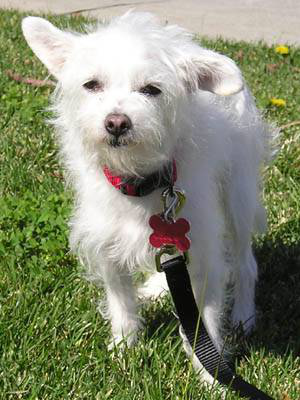

In [104]:
img=load_img('data/dogs-vs-cats/train/dog.12499.jpg')
img

In [105]:
x=img_to_array(img)

In [106]:
np.shape(img)

(400, 300, 3)

In [107]:
# 3차원 -> 4차원
x=x.reshape((1,)+x.shape)
np.shape(x)

(1, 400, 300, 3)

In [108]:
# 가짜 이미지 50개 생성

In [109]:
i=0
for data in data_aug_gen.flow(x, batch_size=1, save_to_dir='data/dogs-vs-cats/copyimg', save_format='png', 
               save_prefix='sample'):
    i+=1
    if i > 50:
        break

In [110]:
# keras를 활용한 강아지, 고양이 분류 